In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
defect_dict = load_tensors_all('./defect_tensors_D10_1/SH0403/', width=128)

(69, 233, 470)
(14, 233, 470)
(161, 464, 222)
(7, 464, 222)


In [3]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 251
number of class 0: 230
	number of SN: 15
number of class 1: 21
	number of SN: 3


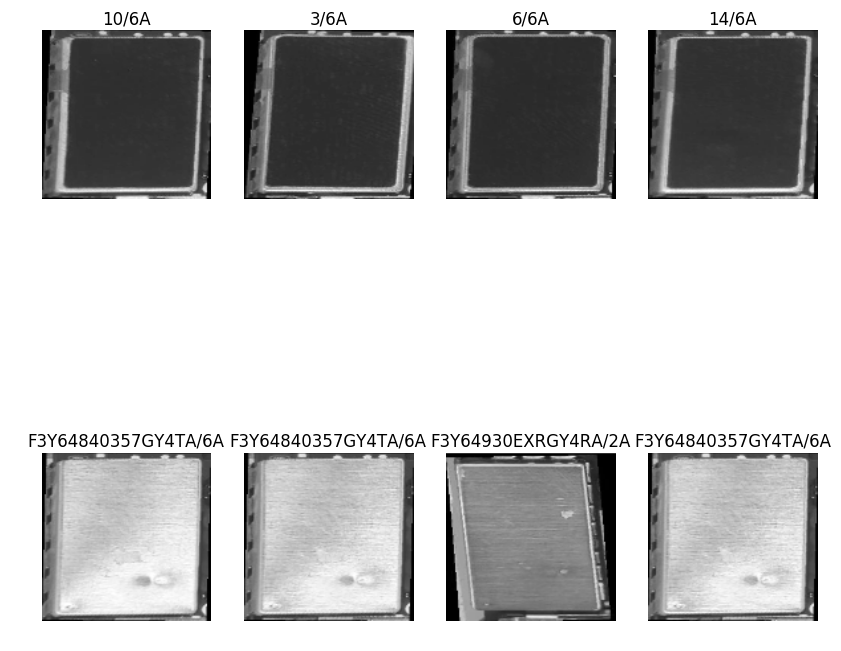

In [4]:
display_tensor(tensors, labels, sns)

In [5]:
from defectlib import GroupKFold_modeling

In [6]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=2, nb_epoch=20, input_shape=(128, 128))

Model 1
the label of validation image: 0
the s/n of validation image: 1
Train on 233 samples, validate on 18 samples
Epoch 1/20
233/233 [==============================] - 4s - loss: 0.2133 - acc: 0.7940 - val_loss: 5.8271e-04 - val_acc: 1.0000
Epoch 2/20
233/233 [==============================] - 4s - loss: 0.0726 - acc: 0.9657 - val_loss: 8.5474e-05 - val_acc: 1.0000
Epoch 3/20
233/233 [==============================] - 4s - loss: 0.0508 - acc: 0.9914 - val_loss: 5.9525e-05 - val_acc: 1.0000
Epoch 4/20
233/233 [==============================] - 4s - loss: 0.0231 - acc: 0.9957 - val_loss: 6.4328e-05 - val_acc: 1.0000
Epoch 5/20
233/233 [==============================] - 4s - loss: 0.0064 - acc: 1.0000 - val_loss: 6.7884e-06 - val_acc: 1.0000
Epoch 6/20
233/233 [==============================] - 4s - loss: 0.0029 - acc: 1.0000 - val_loss: 6.5533e-06 - val_acc: 1.0000
Epoch 7/20
233/233 [==============================] - 4s - loss: 0.0031 - acc: 1.0000 - val_loss: 1.0371e-05 - val_acc: 1

In [8]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, '1', 1.0, 1.0),
 (0, '3', 1.0, 1.0),
 (0, '10', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '12', 1.0, 1.0),
 (0, '13', 1.0, 1.0),
 (0, '14', 1.0, 1.0),
 (0, '2', 1.0, 1.0),
 (0, '0', 1.0, 1.0),
 (0, '8', 1.0, 1.0),
 (0, '7', 1.0, 1.0),
 (0, '11', 1.0, 1.0),
 (0, '5', 1.0, 1.0),
 (0, '9', 1.0, 1.0),
 (0, '6', 1.0, 1.0),
 (1, 'F3Y64840357GY4TA', 1.0, 0.0),
 (1, 'F3Y64850AFSGY4TA', 0.0, 1.0),
 (1, 'F3Y64930EXRGY4RA', 1.0, 0.0)]

In [9]:
for label in set([x[0] for x in accuracy_escape_list]):
    accuracy_result = [x[2] for x in accuracy_escape_list if x[0] == label]
    accuracy_result.sort(reverse=True)
    accuracy_final = np.array(accuracy_result)
    escape_tight = 1 - accuracy_final
    escape_result = [x[3] for x in accuracy_escape_list if x[0] == label]
    escape_result.sort()
    escape_final = np.array(escape_result)
    escape_rough = escape_final
    print 'Result for label {}'.format(label)
    print escape_tight
    print escape_rough
    print "\tPick 1 test"
    print '\t\tTight Escape rate: {}'.format(escape_tight[0])
    print '\t\tRough Escape rate: {}'.format(escape_rough[0])
    print "\tPick 2 test"
    print "\t\tTight Escape rate: {}".format((escape_tight[0] + escape_tight[1]) / 2)
    print "\t\trough Escape rate: {}".format((escape_rough[0] + escape_rough[1]) / 2)

Result for label 0
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 1.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 1.0
Result for label 1
[ 0.  0.  1.]
[ 0.  0.  1.]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.0
